In [1]:
from tqdm import tqdm 
import tensorflow as tf 
from keras.applications.resnet50 import ResNet50
from keras.layers import Flatten, Input
from keras.models import Model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from io import BytesIO
import time
import os
import cv2
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\SAI SUPRAJA M\Anaconda3.6\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = ResNet50(weights='imagenet', pooling=max, include_top = False)

C:\Users\SAI SUPRAJA M\Anaconda3.6\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
bn3d_branch2c (BatchNormalizati (None, None, None, 5 2048        res3d_branch2c[0][0]             
__________________________________________________________________________________________________
add_7 (Add)                     (None, None, None, 5 0           bn3d_branch2c[0][0]              
                                                                 activation_19[0][0]              
__________________________________________________________________________________________________
activation_22 (Activation)      (None, None, None, 5 0           add_7[0][0]                      
__________________________________________________________________________________________________
res4a_branch2a (Conv2D)         (None, None, None, 2 131328      activation_22[0][0]              
__________________________________________________________________________________________________
bn4a_branc

__________________________________________________________________________________________________
bn5b_branch2a (BatchNormalizati (None, None, None, 5 2048        res5b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_44 (Activation)      (None, None, None, 5 0           bn5b_branch2a[0][0]              
__________________________________________________________________________________________________
res5b_branch2b (Conv2D)         (None, None, None, 5 2359808     activation_44[0][0]              
__________________________________________________________________________________________________
bn5b_branch2b (BatchNormalizati (None, None, None, 5 2048        res5b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_45 (Activation)      (None, None, None, 5 0           bn5b_branch2b[0][0]              
__________

In [ ]:
total_time = []

In [44]:
Category = "Men's_Shirts"
res50_feature_list = []
image_names=[]
path = 'C:/Users/SAI SUPRAJA M/Desktop/visual_search/Data/Semi_train/' + Category

start = time.time()
for img_path in os.listdir(path):
    if('.DS_Store' not in os.path.join(path,img_path)):
        image_names.append(img_path)
        img = image.load_img(os.path.join(path,img_path), target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        res50_feature = model.predict(img_data)
        res50_feature_np = np.array(res50_feature)
        res50_feature_list.append(res50_feature_np.flatten())

res50_feature_list_np = np.array(res50_feature_list)
end = time.time()
print("Total Time", end - start)
total_time.append(end - start)

Total Time 1381.4059751033783


In [45]:
total_time

[196.9790964126587,
 1666.9541664123535,
 3236.3922679424286,
 3839.16973733902,
 1381.4059751033783]

In [46]:
res50_feature_list_np.shape

(1057, 100352)

In [47]:
res50_feature_list_np

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 3.895763  , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.8475856 ],
       ...,
       [0.        , 0.        , 0.        , ..., 8.992871  , 0.72350514,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [6.1051345 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [48]:
import pickle

pickled_db_path = "features_resnet/Men's_Shirts.pck"

with open(pickled_db_path, 'wb') as fp:
        pickle.dump(res50_feature_list_np, fp)
        print("dumped")
fp.close()

dumped


In [49]:
start= time.time()
with open(pickled_db_path, 'rb') as fp:
        #vgg_loaded = pickle.load(fp)
        res50_loaded = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [50]:
res50_loaded.shape

(1057, 100352)

In [13]:
query_image_path = "11046_shop_01.jpg"

imgq = image.load_img(query_image_path, target_size=(224, 224))
img_dataq = image.img_to_array(imgq)
img_dataq = np.expand_dims(img_dataq, axis=0)
img_dataq = preprocess_input(img_dataq)
res50_feature_query = model.predict(img_dataq)
res50_feature_np_query = np.array(res50_feature_query)
res50_feature_np_query = res50_feature_np_query.flatten()

In [14]:
res50_feature_np_query.shape

(100352,)

In [16]:
from scipy.spatial import distance

similarity = []
count = 0

for i in res50_loaded:
    count = count+1
    d = distance.cosine(i,res50_feature_np_query)
    sim = 1-d
    similarity.append((sim,image_names[count-1]))


In [17]:
similarity

[(0.17635244131088257, '11038_shop_01.jpg'),
 (0.12348195910453796, '11039_comsumer_04.jpg'),
 (0.09253552556037903, '11040_comsumer_05.jpg'),
 (0.2589302361011505, '11041_comsumer_01.jpg'),
 (0.22355413436889648, '11042_comsumer_02.jpg'),
 (0.13256019353866577, '11043_comsumer_03.jpg'),
 (0.2060282975435257, '11044_comsumer_08.jpg'),
 (0.26254555583000183, '11045_comsumer_09.jpg'),
 (1.0, '11046_shop_01.jpg'),
 (0.18929775059223175, '11047_comsumer_07.jpg'),
 (0.18921028077602386, '11048_comsumer_13.jpg'),
 (0.1997007131576538, '11049_comsumer_12.jpg'),
 (0.2038353681564331, '11050_comsumer_06.jpg'),
 (0.23949535191059113, '11051_comsumer_10.jpg'),
 (0.2847716212272644, '11052_comsumer_04.jpg'),
 (0.2208271473646164, '11053_comsumer_05.jpg'),
 (0.241608127951622, '11054_comsumer_11.jpg'),
 (0.2711440622806549, '11055_comsumer_15.jpg'),
 (0.18332339823246002, '11056_comsumer_01.jpg'),
 (0.18115876615047455, '11057_comsumer_14.jpg'),
 (0.15960095822811127, '11058_comsumer_02.jpg'),
 (0.

In [18]:
def show_img(path):
    img =imread(path, mode="RGB")
    plt.imshow(img)
    plt.show()

Query image ==========================================


C:\Users\SAI SUPRAJA M\Anaconda3.6\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


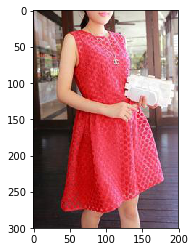

Result images ========================================
similarity 1.0


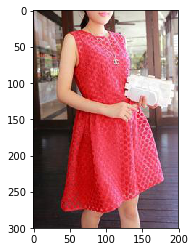

similarity 0.39834314584732056


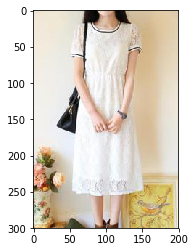

similarity 0.33515334129333496


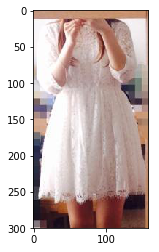

similarity 0.3194624185562134


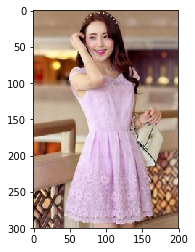

similarity 0.31261441111564636


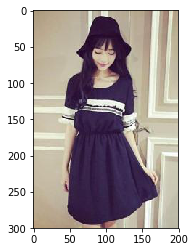

similarity 0.29503577947616577


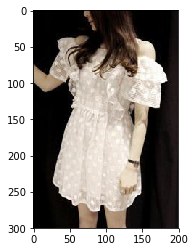

In [20]:
# After sorting images through similarity
des_similarity = sorted(similarity,reverse=True)
des_similarity =des_similarity[:6]
Category = "Lace_Dress"
path = 'C:/Users/SAI SUPRAJA M/Desktop/visual_search/Data/Semi_train/' + Category


print ('Query image ==========================================')
show_img(query_image_path)


print ('Result images ========================================')
for i in range(0,len(des_similarity)):
    print("similarity",des_similarity[i][0])
    show_img(path+ "/"+des_similarity[i][1])
    
end = time.time()

In [ ]:
total_time_main = end - start
print("total_time_main", total_time_main)

In [51]:
total_model_time = 0.0
for i in range(0, len(total_time)):
    total_model_time = total_model_time + total_time[i]

print("total_model_time", total_model_time)

total_model_time 10320.901243209839
